# <center>Laboratorium <br>Metod Numerycznych <br> Całkowanie numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import main
from numpy.polynomial.legendre import leggauss
from scipy.integrate import quad





Całkowanie numeryczne to dziedzina matematyki numerycznej zajmująca się przybliżonym obliczaniem wartości całek matematycznych, zwłaszcza tych, które nie mają rozwiązania analitycznego lub gdy obliczenia analityczne są trudne lub niemożliwe do przeprowadzenia. Całkowanie numeryczne jest szeroko stosowane w praktyce, szczególnie w obszarach takich jak nauki przyrodnicze, inżynieria, ekonometria, czy analiza danych.

Podstawowe metody całkowania numerycznego obejmują:

**Metoda prostokątów**

Metoda prostokątów: Polega na przybliżeniu całki poprzez sumowanie wartości funkcji w punktach środkowych podprzedziałów i pomnożenie tego przez szerokość podprzedziału.

$
\int_{x_0}^{x_n}f(x)dx\approx h\sum_{i=0}^{n-1}f(x_i+\alpha h)
$

gdzie:
$
h = \frac{x_n-x_0}{n}
$

**Metoda trapezów**

Metoda trapezów: Podobnie jak metoda prostokątów, ale używa trapezów zamiast prostokątów. Jest bardziej dokładna dla funkcji, które nie są zupełnie równoległe osi x.

$
\int_{x_0}^{x_n}f(x)dx\approx h\sum_{i=0}^{n-1}\frac{h}{2}(f(x_{i+1})+f(x_i))
$

***Zadanie 1.***

Zaimplementuj metodę prostokątów oraz metodę trapezów w pliku main zgodnie z opisem.

In [2]:
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from scipy.special import roots_legendre
from typing import Union, List, Tuple

def rectangular_rule(func, a, b, n):
    try:
        s = 0.0
        dx = float((b-a)/n)
        while a < b:
            s += dx * func(a)
            a += dx
        return s
    except:
        return None

def trapezoidal_rule(func, a, b, n):
    try: 
        s = 0.0
        dx = float((b - a) / n)

        while a < b:
            s+= (func(a)+func(a+dx))/2*dx
            a += dx
        return s
    except:
        return None


***Zadanie 2.***

Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod zaimplementowanych w zadaniu 1  


In [3]:
from main import rectangular_rule, trapezoidal_rule

def fun(x):
    f = np.log(1 + np.tan(x))
    return f

print (rectangular_rule(fun, 0, np.pi/4, 100))
print (trapezoidal_rule(fun, 0, np.pi/4, 100))

0.27492024390082975
0.2776731914228737


Całkowanie podanej funkcji nie jest możliwe na dowolnym przedziale ze względu na to, że funkcja tangens osiąga nieskończoność dla pewnych kątów. Uniemożliwa to wykonanie logarytmu na nim. 

***Zadanie 3.***

Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 2.



In [4]:
from main import rectangular_rule, trapezoidal_rule

def f(x):
    return np.exp(x**2)

print (rectangular_rule(fun, 0, 1, 100))
print (trapezoidal_rule(fun, 0, 1, 100))

0.44135102813824556
0.4460459988277523


***Zadanie 4.***

Dane są funkcje:

$$f(x) = e^{-x^2}$$

$$g(x) = \frac{1}{x^2+4}$$


Napisz funkcję całkującą *custom_integration*, która wykorzystuje kwadraturę Gaussa-Legendre'a zaimplementowaną w bibliotece numpy.polynomial.legendre. Funkcja powinna przyjmować funkcję do zintegrowania, przedział całkowania oraz rząd kwadratury. Przedział ten zostanie przeskalowany do standardowego przedziału (-1, 1) używając wag i węzłów uzyskanych z funkcji leggauss. Następnie funkcja powinna obliczyć wartość całki przy użyciu kwadratury Gaussa-Legendre'a.

W celu oceny dokładności metody, należy porównać wyniki uzyskane za pomocą tej funkcji z wynikami uzyskanymi za pomocą metody trapezów (np.trapz) na wybranych funkcjach na różnych przedziałach. Równocześnie, należy analizować, jak błąd całkowania zmienia się wraz ze wzrostem rzędu kwadratury. Do tego celu należy użyć funkcji semilogy z biblioteki matplotlib w celu stworzenia wykresu w skali logarytmicznej.




C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_6304\1695597443.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(x**(-2))
C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_6304\1695597443.py:24: RuntimeWarning: invalid value encountered in subtract
  plt.semilogy(rzędy, np.abs(wyniki - trapz_wynik), label=f'Przedział {a}-{b}')


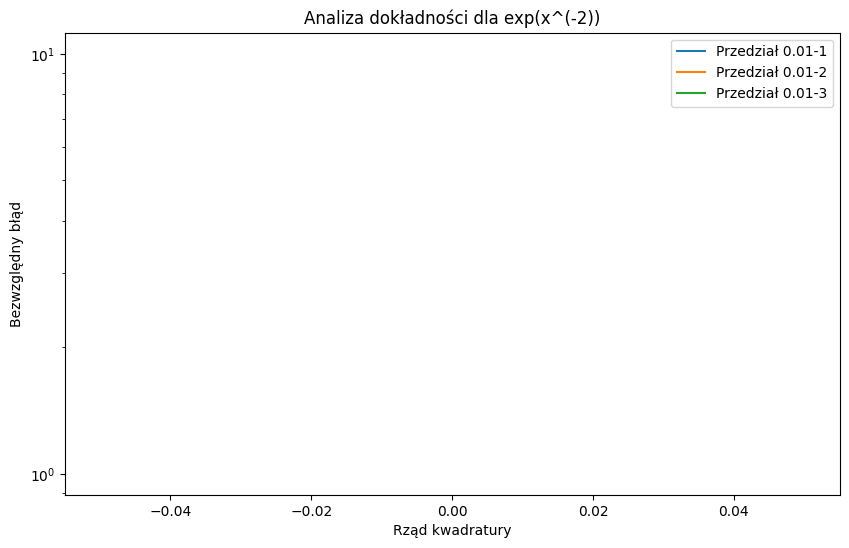

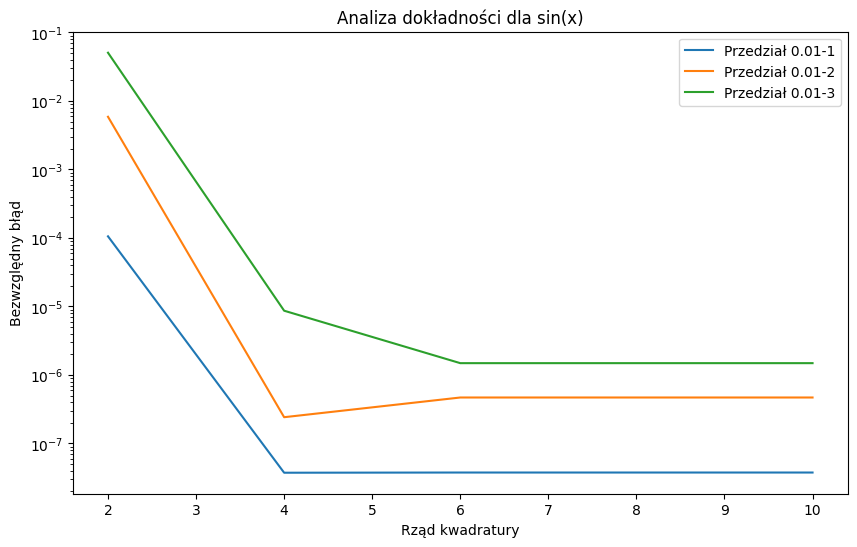

In [5]:
from main import custom_integration
def f1(x):
    return np.exp(x**(-2))

def f2(x):
    return np.sin(x)

# Analiza dokładności metody na przykładzie funkcji i różnych przedziałów
rzędy = [2, 4, 6, 8, 10]  # Rzędy kwadratury do przetestowania
przedziały = [(0.01, 1), (0.01, 2), (0.01, 3)]  # Przedziały do przetestowania

for func, etykieta in zip([f1, f2], ['exp(x^(-2))', 'sin(x)']):
    plt.figure(figsize=(10, 6))
    for przedział in przedziały:
        a, b = przedział
        trapz_wynik = np.trapz(func(np.linspace(a, b, 1000)), np.linspace(a, b, 1000))
        wyniki = []

        for rząd in rzędy:
            gauss_wynik = custom_integration(func, a, b, rząd)
            wyniki.append(gauss_wynik)

        # Wykres
        plt.semilogy(rzędy, np.abs(wyniki - trapz_wynik), label=f'Przedział {a}-{b}')

    plt.title(f'Analiza dokładności dla {etykieta}')
    plt.xlabel('Rząd kwadratury')
    plt.ylabel('Bezwzględny błąd')
    plt.legend()
    plt.show()

Z mojej analizy wynika, że bład całkowania maleje znacząco wraz z rzędem kwadratury przede wszystkim do 6 rzędu. Dla wyższych rzędów błąd jest stały. Błąd również wzrasta wraz z zakresem przedziału całkowania. Niestety nie byłem w stanie przeprowadzić analizy dla funkcji pierwszej ze względu na błąd, którego nie byłem w stanie rozwiązać.

***Zadanie 5***


Wyznacz wartość całki wykorzystując funkcje z *zadania 4* oraz całkowanie adaptacyjne (jest to funkcja *scipy.integrate.quad*).

Zbadaj jak zmienia się błąd całkowania zmieniając błąd względny i bezwzględny w funkcji *quad*. Wybierz 10 różnych wartości.

Utwórz wykres błędu całki w zależności od liczby wywołań funkcji podcałkowej. Liczba wywołań jest w argumencie wyjściowym infodict jako 'neval'.

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_6304\3238787916.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x**(-2))
C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_6304\3110104918.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  errors.append(np.abs(result - custom_integration(f1, a, b, 50)))


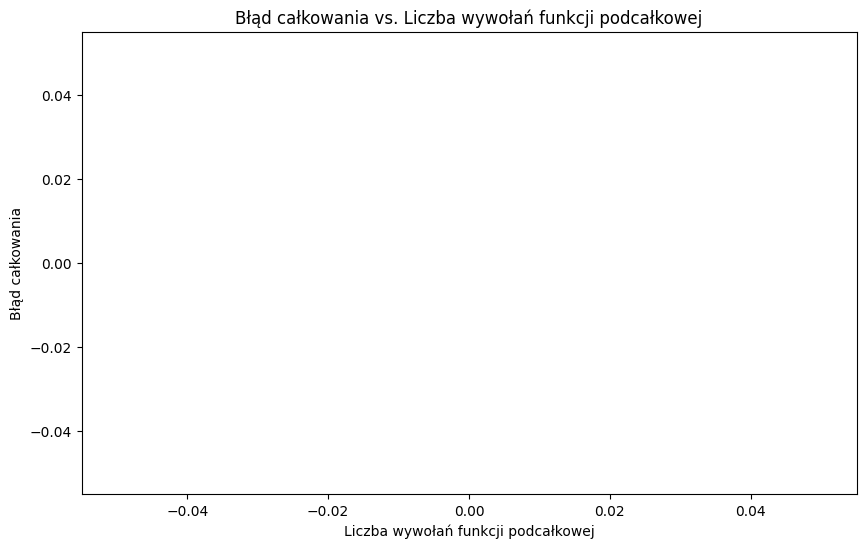

In [16]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

a = 0.01
b = 5

errors = []
eval_counts = []

tolerances = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]

for tol in tolerances:
    def f1_counted(x):
        f1_counted.neval += 1
        return f1(x)

    f1_counted.neval = 0 

    result, _ = quad(f1_counted, a, b, epsabs=tol, epsrel=tol)
    errors.append(np.abs(result - custom_integration(f1, a, b, 50)))
    eval_counts.append(f1_counted.neval)

plt.figure(figsize=(10, 6))
plt.plot(eval_counts, errors, marker='o', linestyle='-')
plt.title('Błąd całkowania vs. Liczba wywołań funkcji podcałkowej')
plt.xlabel('Liczba wywołań funkcji podcałkowej')
plt.ylabel('Błąd całkowania')
plt.show()


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

Na dzisiejszych ćwiczeniach sprawdziłem działanie metod całkowania takich jak metoda prostokątów, trapezów czy za pomocą kwadratury gaussa. Sprawdziłem dokładność kwadratury gaussa i zwizualizowałem ją. 